# Requests Check

In [10]:
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

In [ ]:
import requests
r = requests.get('https://www.python.org')
r

# Filtering rows by column value

In [2]:
import pandas as pd
movies = pd.read_csv('http://bit.ly/imdbratings')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [ ]:
movies.shape

In [ ]:
type(False)

In [ ]:
# Create python list of booleans with the same length of the dataframe. 
#Boolean will be true if it is > 200 mins and false if others
booleans = []
for length in movies.duration:
    if length >= 200:
        booleans.append(True)
    else:
        booleans.append(False)

In [ ]:
booleans[0:5]

In [ ]:
len(booleans)

In [ ]:
# convert booleans list to a pandas series
is_long = pd.Series(booleans)

In [ ]:
is_long.head()

In [ ]:
# pass is_long to the dataframe movies with bracket notation
movies[is_long].head()

#It shows up dataframe with all columns but only shows those with duration > 200 mins

In [ ]:
# There is a shorter way - without the for loop.

#Instead:

In [ ]:
# This completely replaces the need for a 'for' loop.
is_long = movies.duration >= 200 # Series (movies.duration)  ... comparison >=200 and returns series of trues and falses
is_long.head()

In [ ]:
movies[is_long].head()

In [ ]:
# We can eliminate is_long itself
movies[movies.duration >=200].head()

In [ ]:
# If we are studying only the genre of the movies
# you can use dot notation

movies[movies.duration >=200].genre

# or in bracket notations
movies[movies['duration'] >=200]['genre']

#The above code may sometimes cause strange behaviour. Not the best way to do things.
#better practice is to use the .loc method

In [ ]:
# use .loc with a comma
movies.loc[movies['duration'] >=200, 'genre']

#.loc allows selection of rows and columns by 'label'
# in the above movies['duration'] >= 200 are the rows and 'genre' are the columns

## ...For Multiple filter criteria

In [ ]:
import pandas as pd
movies = pd.read_csv('http://bit.ly/imdbratings')
movies.head()

In [ ]:
movies[movies.duration >= 200]

In [ ]:
# how do we select only long movies of genre Drama?

In [ ]:
True and True

In [ ]:
movies[movies.duration >= 200 and movies.genre == 'Drama'] # will not work

In [ ]:
# add parenthesis to add evaluation order
# add ampersand & instead of and

movies[(movies.duration >= 200) & (movies.genre == 'Drama')]

In [ ]:
# or condition - gives a much bigger dataframe
movies[(movies.duration >= 200) | (movies.genre == 'Drama')].head()
movies[(movies.duration >= 200) | (movies.genre == 'Drama')].shape

In [ ]:
# inside the bracket there is a boolean series which tells dataframe which rows display
((movies.duration >= 200) & (movies.genre == 'Drama'))[:5]

In [ ]:
# what if there is a bunch of or conditions on the same series
# either crime or drama or action
# normally
movies[(movies.genre == 'Crime') | (movies.genre == 'Drama') | (movies.genre == 'Action')].head()

In [ ]:
# the above is very wordy.
# to simplify we can use a series method called 'isin'
# it generates a boolean series
movies.genre.isin(['Crime', 'Drama', 'Action'])[:5]

In [ ]:
# The above series can be passed to the DataFrame
movies[movies.genre.isin(['Crime', 'Drama', 'Action'])].head()

# Web Scraping

In [8]:
%%time
# Scraping all HTMLs table from a URL using BeautifulSoup
import pandas as pd
import requests
from bs4 import BeautifulSoup

res = requests.get("https://www.5paisa.com/5pit/spma.asp", verify=False)
soup = BeautifulSoup(res.content, 'lxml')
table = soup.find_all('table')
df = pd.read_html(str(table))
df

C:\Users\kashir\AppData\Local\Continuum\anaconda3\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Wall time: 1.79 s


In [9]:
df

[                   0                        1
 0  Margin Calculator  Span Margin May 4, 2018,
              0      1       2        3        4              5             6   \
 0        Symbol   Mlot  SpMgn%  ExpMgn%  TotMgn%  SpMgnPerShare  ExpMgnPerShr   
 1    PCJEWELLER   1500   40.21    31.04    71.25          44.56       34.3923   
 2    JPASSOCIAT  34000   14.78    21.69    36.47           2.92        4.2838   
 3          RCOM  28000    15.6    20.54    36.14           2.52        3.3172   
 4           IRB   2500      11       20       31          29.81          54.2   
 5    BALRAMCHIN   3500   13.71       15    28.71           9.16         10.02   
 6        RNAVAL   9000   20.05     7.21    27.26           3.62        1.3014   
 7    JETAIRWAYS   1200   10.76       15    25.76          63.86       88.9575   
 8      JUSTDIAL   1400   12.31    13.38    25.69          50.25       54.5837   
 9          DHFL   1500    8.32       15    23.32          54.32       97.9275   
 10

In [ ]:
# %%time
# Scraping an HTML table into pandas
import pandas as pd
url = "https://www.5paisa.com/5pit/spma.asp"
df = pd.read_html(url)[1]
df

In [ ]:
from lxml import etree, html
import requests

url = "https://finance.google.com/finance?q=NSE:PFC"

page = requests.get(url)
root = html.fromstring(page.content)
dividend = float(root.findall('.//table')[2].text_content().strip().split("\n")[2].split('/')[0])
dividend

# Use of loc and iloc

In [ ]:
## Pandas Index
## ...from Data School - ref: https://www.youtube.com/watch?v=OYZNk7Z9s6I
import pandas as pd
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [ ]:
drinks.head()

In [ ]:
drinks.index

In [ ]:
drinks.columns

In [ ]:
drinks.shape

In [ ]:
pd.read_table('http://bit.ly/movieusers', header = None, sep = '|').head()

In [ ]:
drinks[drinks.continent == 'South America']

In [ ]:
drinks.loc[23, 'beer_servings']

In [ ]:
drinks.set_index('country', inplace=True)
drinks.head()

In [ ]:
drinks.index

In [ ]:
drinks.columns

In [ ]:
drinks.shape

In [ ]:
drinks.loc['Brazil', 'beer_servings']

In [ ]:
drinks.index.name = None
drinks.head()

In [ ]:
drinks.index.name = 'country'

In [ ]:
drinks.reset_index(inplace = True)

In [ ]:
drinks.head()

In [ ]:
drinks.describe()

In [ ]:
drinks.describe().loc['25%', 'beer_servings']

In [ ]:
drinks.head()

In [ ]:
drinks.continent.head()

In [ ]:
drinks.set_index('country', inplace=True)

In [ ]:
drinks.head()

In [ ]:
drinks.continent.head()

In [ ]:
drinks.continent.value_counts()

In [ ]:
drinks.continent.value_counts()['Africa']

In [ ]:
drinks.continent.value_counts().sort_values()

In [ ]:
drinks.continent.value_counts().sort_index()

In [ ]:
people = pd.Series([3000000, 85000], index=['Albania', 'Andorra'], name = 'population')
people

In [ ]:
drinks.beer_servings * people

In [ ]:
pd.concat([drinks, people], axis=1).head()

In [ ]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [ ]:
drinks.head()

In [ ]:
drinks.info()

In [ ]:
drinks.info(memory_usage = 'deep')

In [ ]:
drinks.memory_usage(deep=True)

In [ ]:
drinks.memory_usage(deep=True).sum()

In [ ]:
sorted(drinks.continent.unique())

In [ ]:
drinks.continent.head()

In [ ]:
drinks['continent'] = drinks.continent.astype('category')

In [ ]:
drinks.dtypes

In [ ]:
drinks.continent.head()

In [ ]:
drinks.continent.cat.codes.head()

In [ ]:
drinks.memory_usage(deep=True)

In [ ]:
drinks['country'] = drinks.country.astype('category')

In [ ]:
drinks.memory_usage(deep=True)

In [ ]:
drinks.country.cat.categories

# Handling date and time in python

In [ ]:
import pandas as pd
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.head()

In [ ]:
# Analyze sightings by year or time
# Check the dtypes
ufo.dtypes # time column shows an object - in this case a string

In [ ]:
ufo.Time.str.slice(-5, -3).head()  #outputs as a string

In [ ]:
ufo.Time.str.slice(-5, -3).astype(int).head()

In [ ]:
# the above approach is very brittle. It easily breaks
# overwrite the time column. Overwrite the Time column.
ufo['Time'] = pd.to_datetime(ufo.Time)

In [ ]:
ufo.head()

In [ ]:
# real thing that's changed is dtype is now datetime
ufo.dtypes

In [ ]:
# pandas just figures out the date. If not, there are lot of options in to_datetime
ufo.Time.dt.hour # Pulls out the hour
ufo.Time.dt.weekday_name[:4] # Pulls out the name of the week!
# Search the reference page for '.dt.'

In [ ]:
# Let's pass a string instead of a series
pd.to_datetime('1/1/1999') #outputs a timestamp. Did not have to specify month and year

In [ ]:
ts = pd.to_datetime('1/1/1999') # Save it for comparison

In [ ]:
ufo.loc[ufo.Time >= ts, :].head() #only shows othe ufo's sighted after 1/1/1999

In [ ]:
# can do math operations
ufo.Time.max() # Latest timestamp in the time series

In [ ]:
ufo.Time.max() - ufo.Time.min() # time delta object tells the difference

In [ ]:
#timedelta objects have attributes like .days
(ufo.Time.max() - ufo.Time.min()).days

In [ ]:
# no of ufo reports by year. Plot!
%matplotlib inline
ufo['Year'] = ufo.Time.dt.year

In [ ]:
ufo.head()

In [ ]:
ufo.Year.value_counts().sort_index().plot()  #sort by order of index

# Handling inputs in date format
Following code converts any text input to appropriate date format

In [1]:
from datetime import datetime
from dateutil.parser import parse

while True:
    expiry = input('Expiry: ')
    try:
        parse(expiry)
    except ValueError:
        print("Enter date in any proper format")
    expiry = parse(expiry)
    break

expiry

Expiry: May 13, 2018


datetime.datetime(2018, 5, 13, 0, 0)

# Vectorize

In [ ]:
import pandas as pd
import numpy as np
import requests

# x = ['~', 'A', 'Sun']   # Works
x = ['~', 'Walter', 'A', 'Sun'] # Doesn't work because of Walter 
df = pd.DataFrame(x, columns=['x'])

u = "https://en.wikipedia.org/wiki/"

df['URL'] = u + df['x']

def tbl10(u):
    html = requests.get(u).content
    tbl = pd.read_html(u)[10]
    return tbl

v = np.vectorize(tbl10)
pd.concat(v(df.URL))


# Try-Except Error detection

In [ ]:
while True:
    try:
        x = int(input("Please enter a number: "))
        break
    except ValueError:
        pass
        print("Oops! That was no valid number. Try again...")

# Examples of where

In [ ]:
import pandas as pd, numpy as np
df = pd.DataFrame(np.arange(10).reshape(-1, 2), columns=['A', 'B'])
df

In [ ]:
m = df % 3 == 0
m

# Map and Apply experiments

In [ ]:
import pandas as pd
train = pd.read_csv('http://bit.ly/kaggletrain')
train.head()

In [ ]:
#translate sex to 1 and 0 using map
train['Sex_num'] = train.Sex.map({'female':0, 'male':1})

In [ ]:
#compare sex and sex num
train.loc[0:4, ['Sex', 'Sex_num']]

In [ ]:
#use apply method for a function
train['Name_len'] = train.Name.apply(len)

train.loc[0:4, ['Name', 'Name_len']]

In [ ]:
import numpy as np
train['Fare_ceil'] = train.Fare.apply(np.ceil)

train.loc[0:4, ['Fare', 'Fare_ceil']]

train.Name.str.split(',').head()

In [ ]:
def get_element(my_list, position):
    return my_list[position]

train.Name.str.split(',').apply(get_element, position=0).head()

In [ ]:
train.Name.str.split(',').apply(lambda x: x[0]).head()

In [ ]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

In [ ]:
drinks.loc[:, 'beer_servings':'wine_servings'].apply(max, axis=1)

In [ ]:
drinks.loc[:, 'beer_servings':'wine_servings'].apply(max, axis=0)

In [ ]:
drinks.loc[:, 'beer_servings':'wine_servings'].apply(np.argmax, axis=1)

In [ ]:
drinks.loc[:, 'beer_servings':'wine_servings'].applymap(float).head()

In [ ]:
drinks.loc[:, 'beer_servings':'wine_servings']=drinks.loc[:, 'beer_servings':'wine_servings'].applymap(float)

drinks.head()

# Experiments with arguments

In [ ]:
def varargs(*args):
    return args

varargs(1,2,3)

In [ ]:
def keyword_args(**kwargs):
    return kwargs

keyword_args(big="foot", loch="ness")

In [ ]:
def all_the_args(*args, **kwargs):
    print(args)
    print(kwargs)

all_the_args(1, 2, a=3, b=4)

In [ ]:
args = (1, 2, 3, 4)
kwargs = {"a": 3, "b": 4}
all_the_args(*args)

In [ ]:
all_the_args(*kwargs)

In [ ]:
all_the_args(**kwargs)

In [ ]:
all_the_args(*args, **kwargs)

# groupby in pandas

In [2]:
import pandas as pd
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [3]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [4]:
# average beer servings
drinks.beer_servings.mean()

106.16062176165804

In [6]:
# beer servings by continent
drinks.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [8]:
# how does the work. Let us filter and see
drinks[drinks.continent == 'Africa'].beer_servings.mean()

61.471698113207545

In [9]:
# there are other functions too... e.g. max, min, etc.
drinks.groupby('continent').beer_servings.max()

continent
Africa           376
Asia             247
Europe           361
North America    285
Oceania          306
South America    333
Name: beer_servings, dtype: int64

In [11]:
# even powerful is .agg ... allows multiple aggregation functions
drinks.groupby('continent').beer_servings.agg(['count', 'min', 'max', 'mean'])

,count,min,max,mean
continent,,,,
Africa,53,0,376,61.471698
Asia,44,0,247,37.045455
Europe,45,0,361,193.777778
North America,23,1,285,145.434783
Oceania,16,0,306,89.687500
South America,12,93,333,175.083333


In [12]:
# if no aggregation is specified, it aggregates all numeric values
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


In [13]:
# display in visual
%matplotlib inline

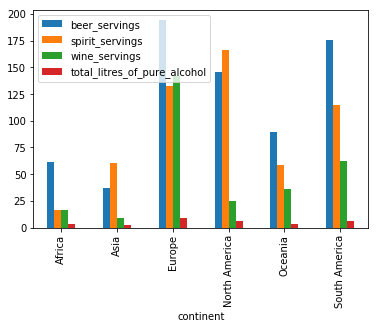

In [14]:
drinks.groupby('continent').mean().plot(kind='bar')

In [ ]:
# how to display the groups?
g = drinks.groupby('continent')
for continent, continent_df in g:
    print(continent)
    print(continent_df)

In [17]:
# to get the specific dataframe
g.get_group('Africa').head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
2,Algeria,25,0,14,0.7,Africa
4,Angola,217,57,45,5.9,Africa
18,Benin,34,4,13,1.1,Africa
22,Botswana,173,35,35,5.4,Africa
26,Burkina Faso,25,7,7,4.3,Africa


In [19]:
# The concept is of split, apply and combine
drinks.groupby('continent').agg('max')  # groupby is split, agg is apply and max is combine

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,,
Africa,Zimbabwe,376,152,233,9.1
Asia,Yemen,247,326,123,11.5
Europe,United Kingdom,361,373,370,14.4
North America,USA,285,438,100,11.9
Oceania,Vanuatu,306,254,212,10.4
South America,Venezuela,333,302,221,8.3


In [21]:
# gives all the detaiils
g.describe()

beer_servings                                              \
                      count        mean        std   min     25%    50%   
continent                                                                 
Africa                 53.0   61.471698  80.557816   0.0   15.00   32.0   
Asia                   44.0   37.045455  49.469725   0.0    4.25   17.5   
Europe                 45.0  193.777778  99.631569   0.0  127.00  219.0   
North America          23.0  145.434783  79.621163   1.0   80.00  143.0   
Oceania                16.0   89.687500  96.641412   0.0   21.00   52.5   
South America          12.0  175.083333  65.242845  93.0  129.50  162.5   

                             spirit_servings              ...    \
                  75%    max           count        mean  ...     
continent                                                 ...     
Africa          76.00  376.0            53.0   16.339623  ...     
Asia            60.50  247.0            44.0   60.840909  ...     
Europe         270.00  361.0            45.0  132.555556  ...     
North America  198.00  285.0            23.0  165.739130  ...     
Oceania        125.75  306.0            16.0   58.437500  ...     
South America  198.00  333.0            12.0  114.750000  ...     

              total_litres_of_pure_alcohol       wine_servings              \
                                       75%   max         count        mean   
continent                                                                    
Africa                               4.700   9.1          53.0   16.264151   
Asia                                 2.425  11.5          44.0    9.068182   
Europe                              10.900  14.4          45.0  142.222222   
North America                        7.000  11.9          23.0   24.521739   
Oceania                              6.150  10.4          16.0   35.625000   
South America                        7.375   8.3          12.0   62.416667   

                                                           
                     std  min   25%    50%     75%    max  
continent                                                  
Africa         38.846419  0.0   1.0    2.0   13.00  233.0  
Asia           21.667034  0.0   0.0    1.0    8.00  123.0  
Europe         97.421738  0.0  59.0  128.0  195.00  370.0  
North America  28.266378  1.0   5.0   11.0   34.00  100.0  
Oceania        64.555790  0.0   1.0    8.5   23.25  212.0  
South America  88.620189  1.0   3.0   12.0   98.50  221.0  

[6 rows x 32 columns]

continent
Africa           AxesSubplot(0.125,0.125;0.775x0.755)
Asia             AxesSubplot(0.125,0.125;0.775x0.755)
Europe           AxesSubplot(0.125,0.125;0.775x0.755)
North America    AxesSubplot(0.125,0.125;0.775x0.755)
Oceania          AxesSubplot(0.125,0.125;0.775x0.755)
South America    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

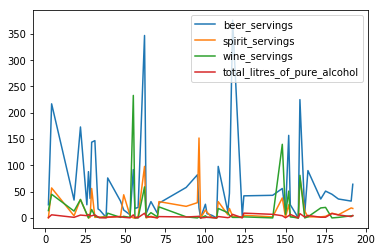

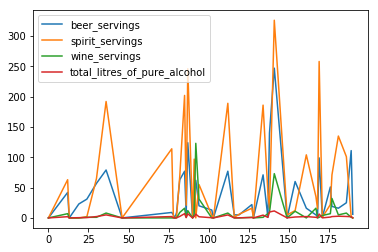

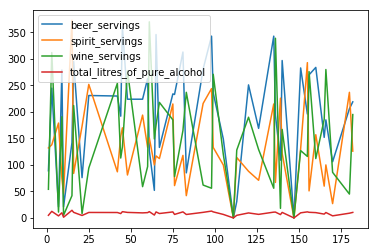

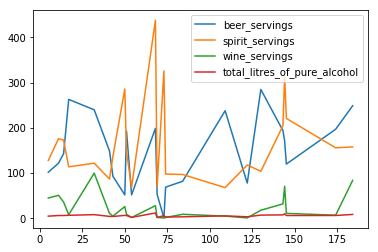

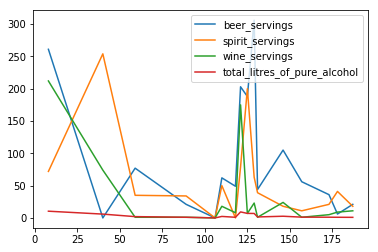

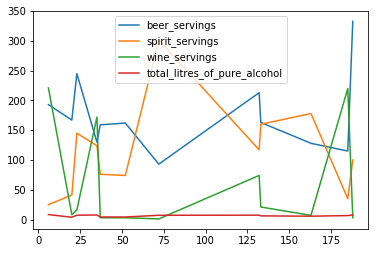

In [23]:
%matplotlib inline
g.plot()